## Importing modules


In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/patient-healthcare/sample_submission.csv
/kaggle/input/patient-healthcare/train.csv
/kaggle/input/patient-healthcare/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

%matplotlib inline

# For Filtering the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/patient-healthcare/train.csv')
test = pd.read_csv('/kaggle/input/patient-healthcare/test.csv')

## Viewing Data

In [4]:
df.head()

encounter_id  patient_id  hospital_id   age        bmi  elective_surgery  \
0         36751       69039          158  66.0  35.693127                 0   
1         68336      127397           47  48.0  18.966902                 0   
2         71682       77670           27  76.0  19.278960                 0   
3        114267       19566          100  43.0  45.617284                 0   
4        128055      104990          189  86.0  26.756678                 0   

          ethnicity gender  height      icu_admit_source  ...  cirrhosis  \
0         Caucasian      F   152.4  Accident & Emergency  ...        0.0   
1  African American      F   165.1  Accident & Emergency  ...        0.0   
2         Caucasian      M   173.0  Accident & Emergency  ...        0.0   
3         Caucasian      M   180.0                 Floor  ...        0.0   
4         Caucasian      F   154.9  Accident & Emergency  ...        0.0   

  diabetes_mellitus hepatic_failure  immunosuppression  leukemia  lymphoma  \
0               0.0             0.0                0.0       0.0       0.0   
1               0.0             0.0                0.0       0.0       0.0   
2               0.0             0.0                0.0       0.0       0.0   
3               0.0             0.0                0.0       0.0       0.0   
4               0.0             0.0                0.0       0.0       0.0   

   solid_tumor_with_metastasis  apache_3j_bodysystem  apache_2_bodysystem  \
0                          0.0           Respiratory          Respiratory   
1                          0.0                Sepsis       Cardiovascular   
2                          1.0                Sepsis       Cardiovascular   
3                          0.0         Genitourinary  Renal/Genitourinary   
4                          0.0        Cardiovascular       Cardiovascular   

   has_died  
0         0  
1         1  
2         0  
3         0  
4         1  

[5 rows x 84 columns]

In [5]:
test.head()

encounter_id  patient_id  hospital_id   age        bmi  elective_surgery  \
0         21017      112951          166  57.0  24.161722                 1   
1         64708       17307           39   NaN  21.830956                 0   
2         64871      123759          116  72.0  24.332277                 0   
3        124400       47970          100  52.0  27.625362                 0   
4         32760       24104            2  31.0  39.869524                 1   

   ethnicity gender  height           icu_admit_source  ...  aids cirrhosis  \
0  Caucasian      M   193.0  Operating Room / Recovery  ...   0.0       0.0   
1  Caucasian      M   170.2       Accident & Emergency  ...   0.0       0.0   
2  Caucasian      M   188.0       Accident & Emergency  ...   0.0       0.0   
3  Caucasian      F   162.0       Accident & Emergency  ...   0.0       0.0   
4  Caucasian      F   152.4  Operating Room / Recovery  ...   0.0       0.0   

  diabetes_mellitus  hepatic_failure  immunosuppression  leukemia  lymphoma  \
0               0.0              0.0                0.0       0.0       0.0   
1               0.0              0.0                0.0       0.0       0.0   
2               0.0              0.0                0.0       0.0       0.0   
3               0.0              0.0                0.0       0.0       0.0   
4               0.0              0.0                0.0       0.0       0.0   

   solid_tumor_with_metastasis  apache_3j_bodysystem  apache_2_bodysystem  
0                          0.0                Trauma               Trauma  
1                          0.0                Trauma               Trauma  
2                          0.0  Musculoskeletal/Skin  Undefined Diagnoses  
3                          0.0             Metabolic            Metabolic  
4                          0.0        Cardiovascular  Undefined diagnoses  

[5 rows x 83 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64199 entries, 0 to 64198
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   64199 non-null  int64  
 1   patient_id                     64199 non-null  int64  
 2   hospital_id                    64199 non-null  int64  
 3   age                            61206 non-null  float64
 4   bmi                            61844 non-null  float64
 5   elective_surgery               64199 non-null  int64  
 6   ethnicity                      63229 non-null  object 
 7   gender                         64185 non-null  object 
 8   height                         63293 non-null  float64
 9   icu_admit_source               64117 non-null  object 
 10  icu_id                         64199 non-null  int64  
 11  icu_stay_type                  64199 non-null  object 
 12  icu_type                       64199 non-null 

## Displaying proportion of missing values in each column of the dataset

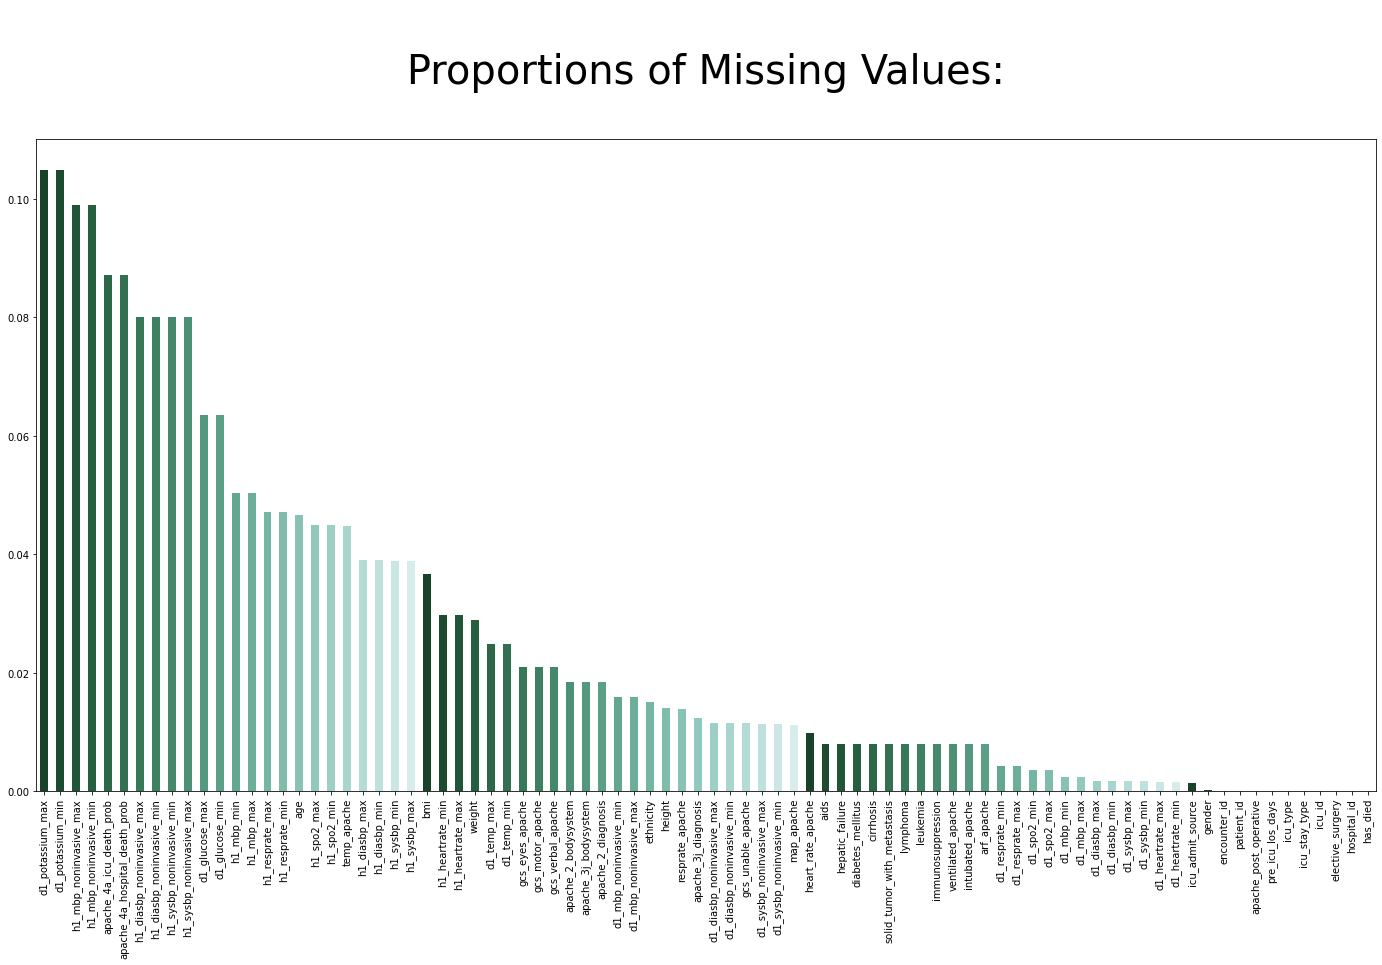

In [7]:
d=((df.isnull().sum()/df.shape[0])).sort_values(ascending=False)
d.plot(kind='bar',
       color=sns.cubehelix_palette(start=2, rot=0.15, dark=0.2, light=0.9, reverse=True, n_colors=24),
        figsize=(24,12))
plt.title("\nProportions of Missing Values:\n",fontsize=40)
plt.show()

## Handling Categorical Values


In [8]:
from sklearn.preprocessing import OrdinalEncoder

features = ['encounter_id', 'hospital_id', 'ethnicity', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'apache_3j_bodysystem', 'apache_2_bodysystem']
encoder = OrdinalEncoder(
        handle_unknown='use_encoded_value', 
        unknown_value=-1
    ).fit(df[features])
df[features] = encoder.transform(df[features])
test[features] = encoder.transform(test[features])

## Handling Missing values

#### 1. Gender: Frst filling the missing values with the mode of the gender

In [9]:
df.fillna({"gender":df['gender'].mode()[0]},  inplace=True)
test.fillna({"gender":test['gender'].mode()[0]},  inplace=True)

#### 2. Now, assigning, Male-1 and Female-0 to convert them into integer values

In [10]:
df['gender'] = df['gender'].replace(['M','F'], [1,0])
test['gender'] = test['gender'].replace(['M','F'], [1,0])

##### 3. Viewing our data

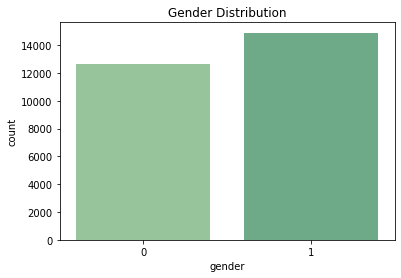

In [11]:
fig=sns.countplot(x=test['gender'],label="Gender", palette=sns.cubehelix_palette(rot=-.5,light=0.7,hue=1))
plt.title("Gender Distribution")
plt.show()

## Filling missing values of Height, Weight, and Age by their mode and of BMI by calculating (Weight/(Height)^2)

In [12]:
df.fillna({"height":df['height'].mode()[0],
          "weight":df['weight'].mode()[0],
          "age":df['age'].mode()[0]},  inplace=True)

df.fillna({"bmi":(df['weight']/(df['height']**2) * 10000)[0]},  inplace=True)

In [13]:
test.fillna({"height":test['height'].mode()[0],
          "weight":test['weight'].mode()[0],
          "age":test['age'].mode()[0]},  inplace=True)

test.fillna({"bmi":(test['weight']/(test['height']**2) * 10000)[0]},  inplace=True)

## Displaying feature distribution of the dataset before replacing NULL Values

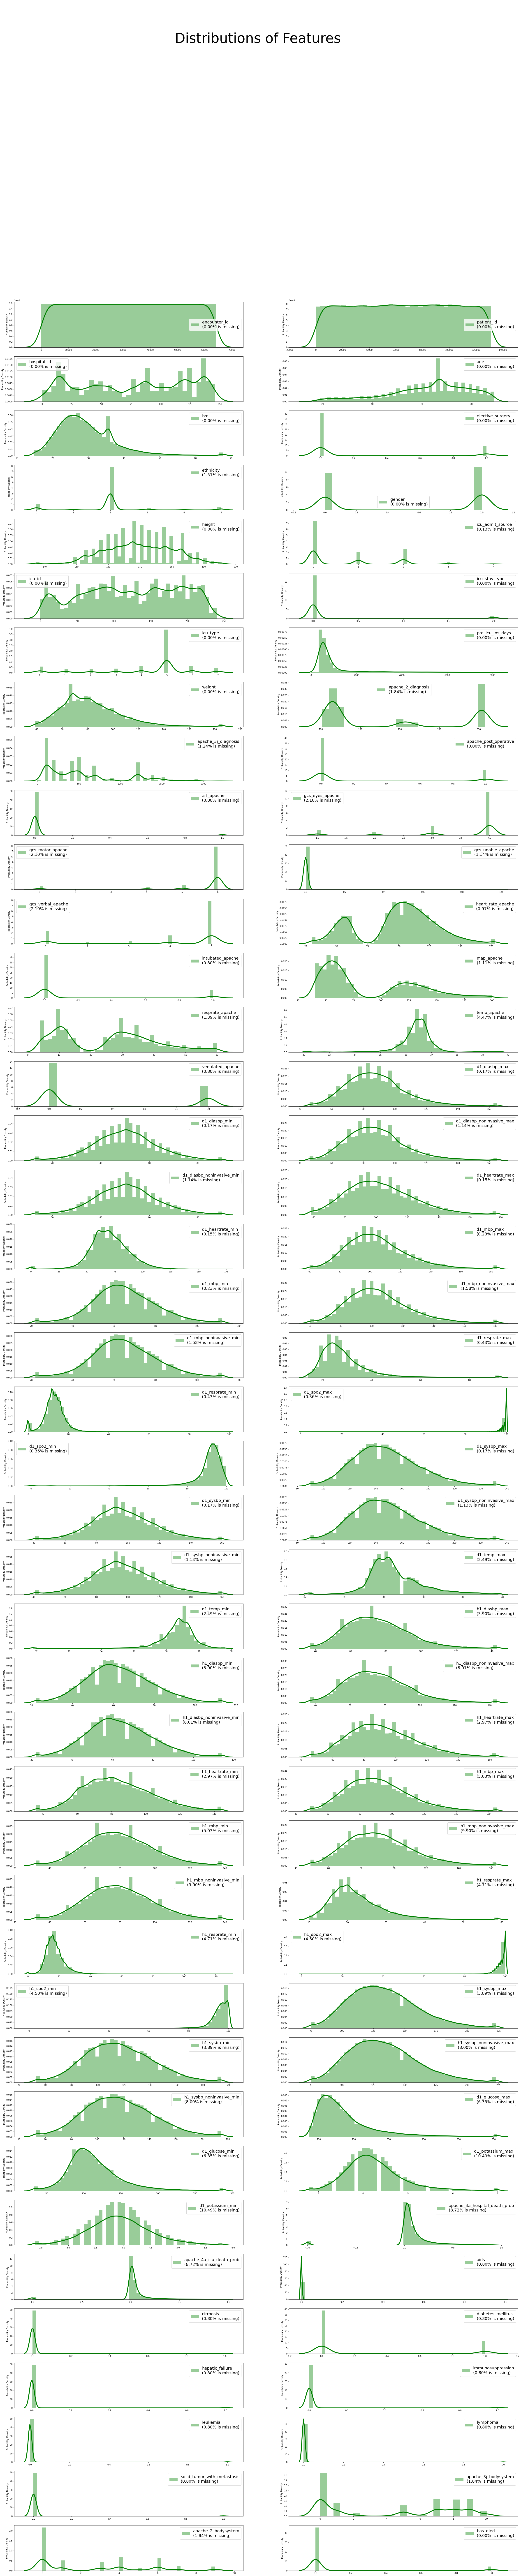

In [14]:
n_rows, n_cols = (42,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(40, 185))
figure.suptitle('\n\nDistributions of Features', fontsize=60)

for index, column in enumerate(df):
    
    i,j = (index // n_cols), (index % n_cols)
    
    miss_perc="%.2f"%(100*(1-(df[column].dropna().shape[0])/df.shape[0]))
    
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    fig=sns.distplot(df[column], color="g", label=collabel, norm_hist=True,
    
    ax=axes[i,j], kde_kws={"lw":4})
    
    fig=fig.legend(loc='best', fontsize=18)
    
    axes[i,j].set_ylabel("Probability Density",fontsize='medium')
    
    axes[i,j].set_xlabel(None)

plt.show()

## DIsplaying Missing data in *has_died* column

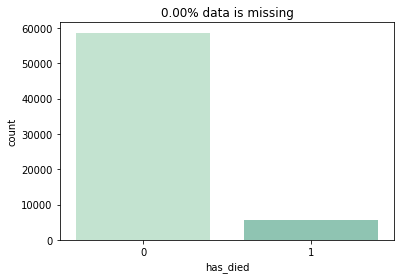

In [15]:
miss_perc="%.2f"%(100*(1-(df['has_died'].dropna().shape[0])/df.shape[0]))
    
fig=sns.countplot(x=df['has_died'],label="Death", palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1))
plt.title("{}% data is missing".format(miss_perc))
plt.show()

## Filling missing values. (In future, apply better techniques like imputation)


In [16]:
df.fillna(df.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)

## Heatmap and Correlation


<AxesSubplot:>

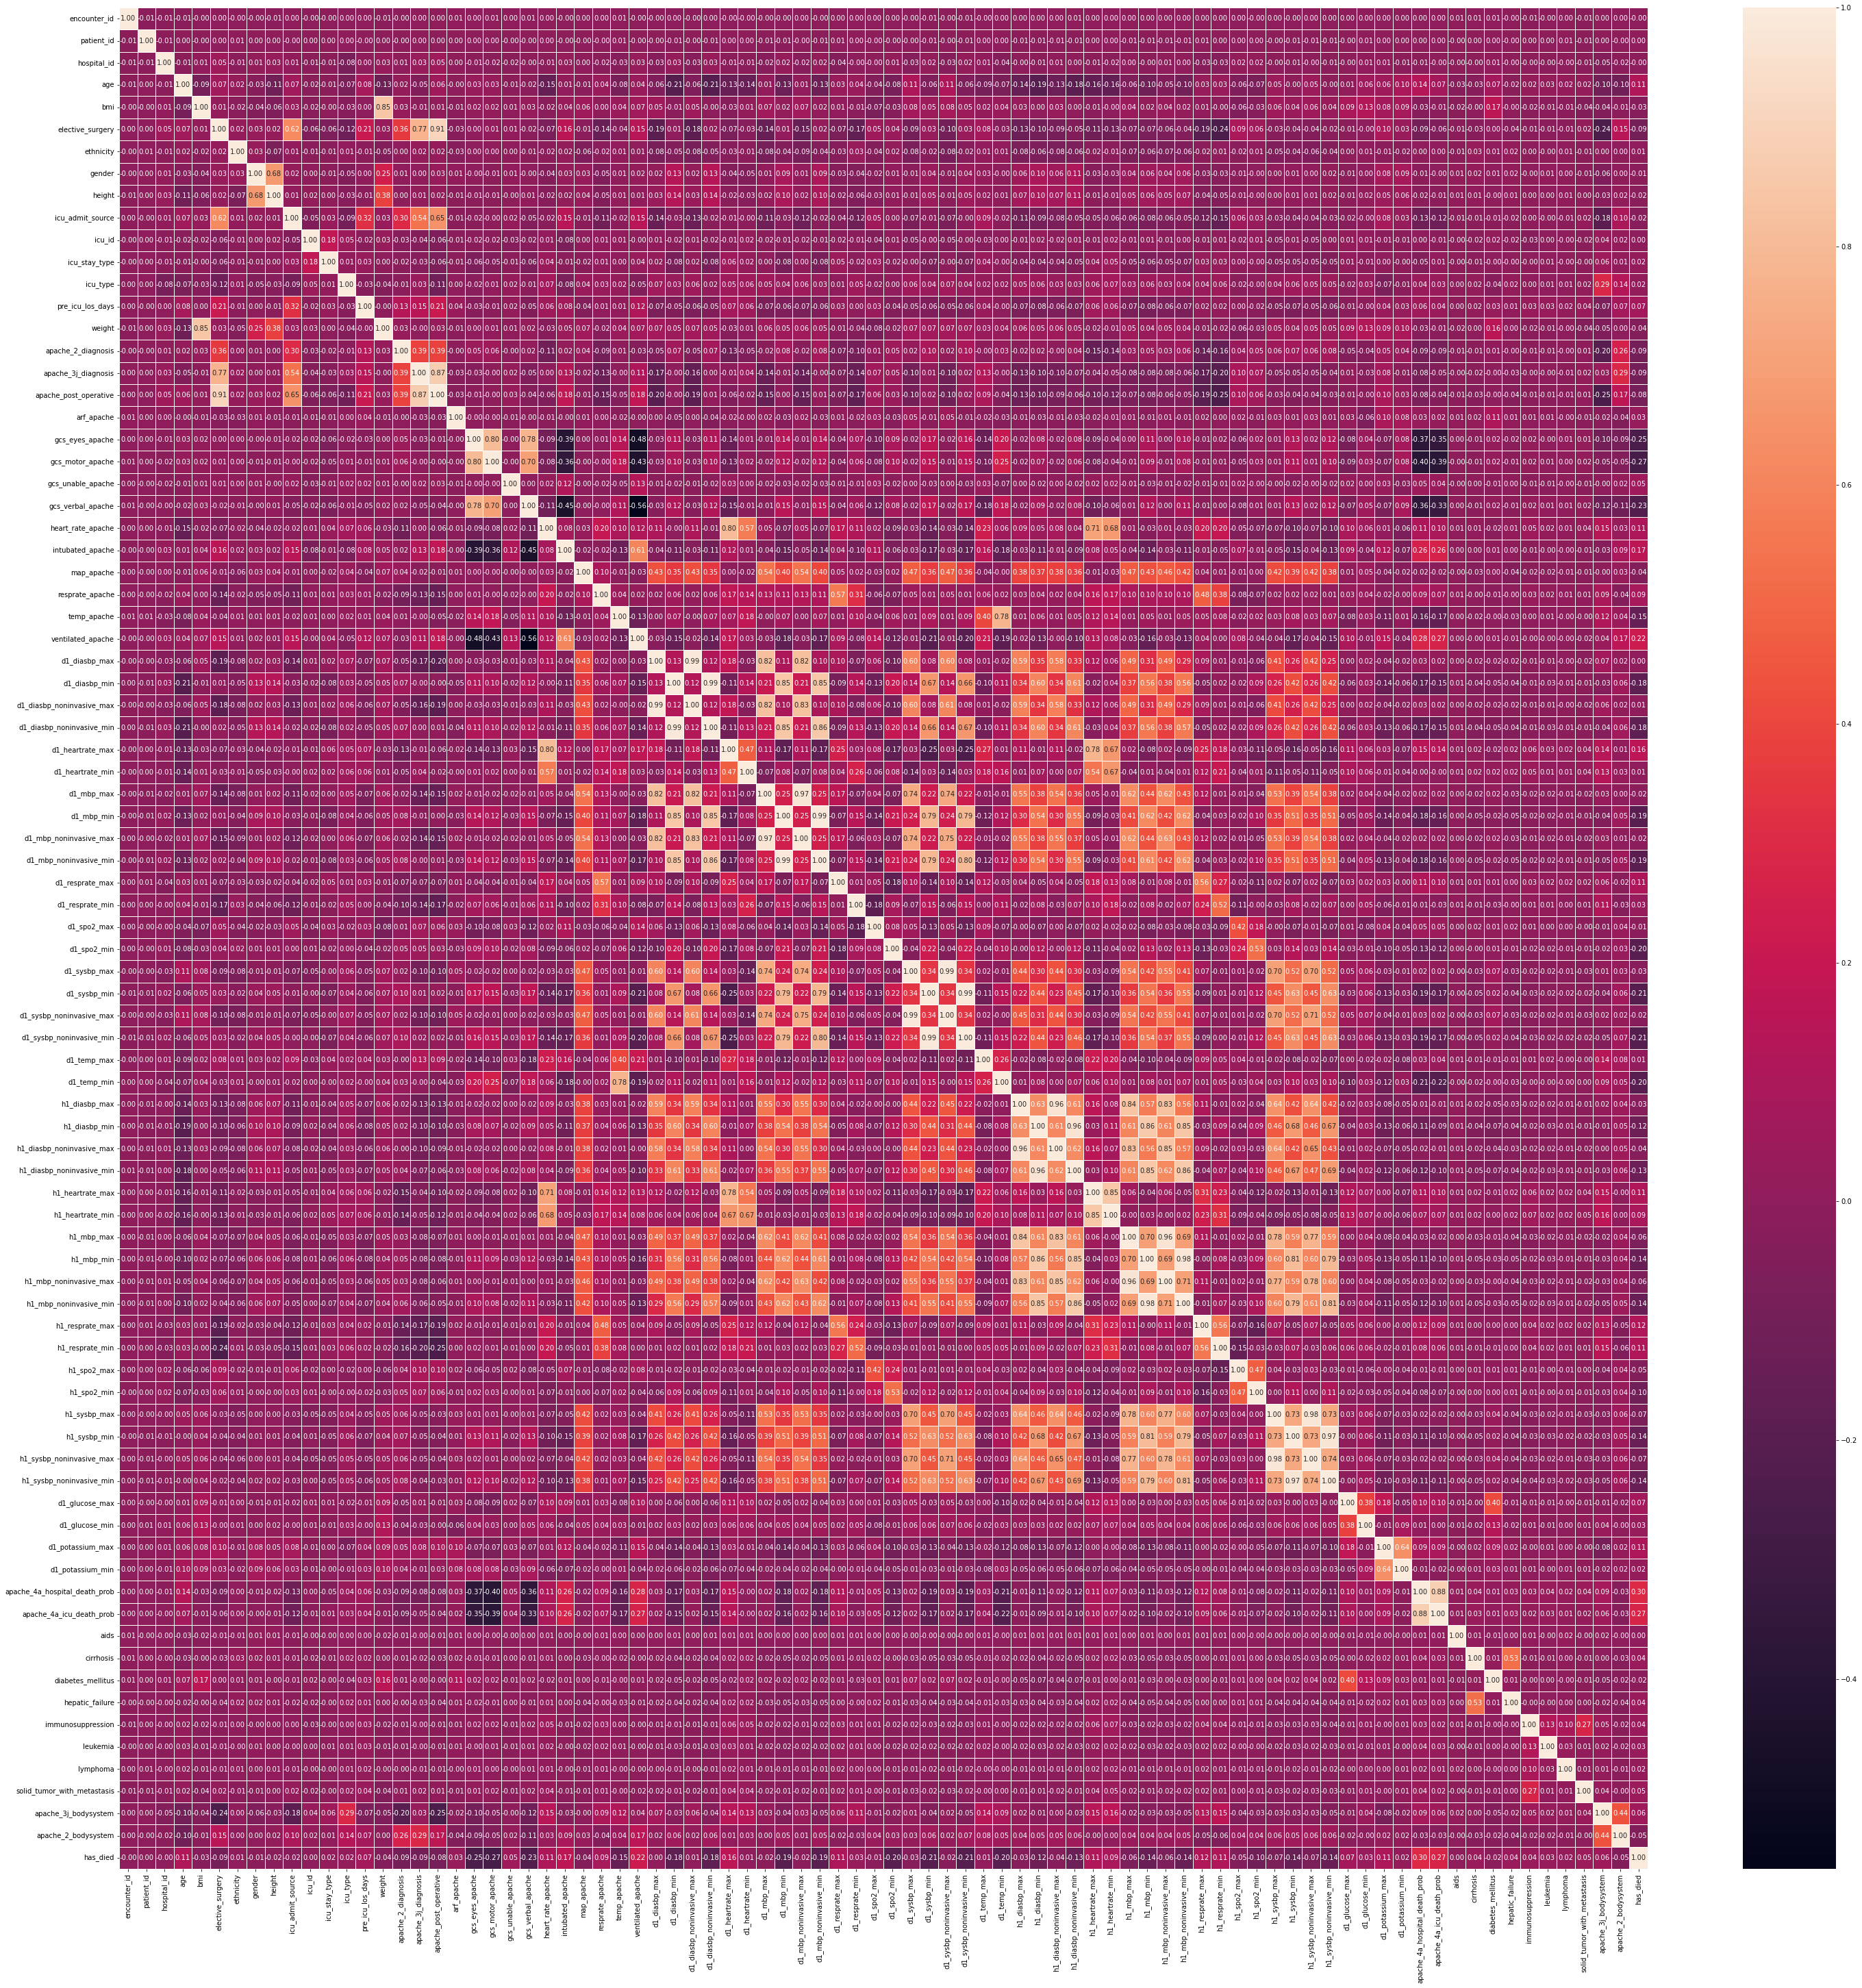

In [17]:
import seaborn as sns
plt.figure(figsize = (50,50))
sns.heatmap(df.corr(), annot = True, fmt=".2f",linewidths=0.5)


In [18]:
df.corr()

encounter_id  patient_id  hospital_id       age  \
encounter_id                     1.000000   -0.010712    -0.008692 -0.005628   
patient_id                      -0.010712    1.000000    -0.010085  0.004322   
hospital_id                     -0.008692   -0.010085     1.000000 -0.007078   
age                             -0.005628    0.004322    -0.007078  1.000000   
bmi                             -0.003025   -0.001129     0.008694 -0.085875   
...                                   ...         ...          ...       ...   
lymphoma                         0.000129    0.005615    -0.001855  0.023386   
solid_tumor_with_metastasis     -0.008302   -0.005796    -0.005304  0.024478   
apache_3j_bodysystem             0.001554    0.003566    -0.046035 -0.099933   
apache_2_bodysystem              0.002673   -0.002281    -0.015398 -0.104308   
has_died                        -0.002564    0.004831    -0.003839  0.111154   

                                  bmi  elective_surgery  ethnicity    gender  \
encounter_id                -0.003025          0.003980  -0.001991 -0.001362   
patient_id                  -0.001129          0.000139   0.005018  0.003800   
hospital_id                  0.008694          0.053019  -0.010444  0.014004   
age                         -0.085875          0.067550   0.024514 -0.028999   
bmi                          1.000000          0.013469  -0.020154 -0.038515   
...                               ...               ...        ...       ...   
lymphoma                    -0.009498         -0.011747   0.005591  0.002971   
solid_tumor_with_metastasis -0.039577          0.015663  -0.009233 -0.008568   
apache_3j_bodysystem        -0.043802         -0.243783   0.002849 -0.056373   
apache_2_bodysystem         -0.007750          0.152684   0.004296  0.004266   
has_died                    -0.030474         -0.093734   0.005267 -0.005950   

                               height  icu_admit_source  ...  cirrhosis  \
encounter_id                -0.005178          0.001717  ...   0.005494   
patient_id                   0.002774         -0.004754  ...   0.002115   
hospital_id                  0.025650          0.008874  ...  -0.000447   
age                         -0.111879          0.066571  ...  -0.028007   
bmi                         -0.057286          0.028735  ...  -0.003814   
...                               ...               ...  ...        ...   
lymphoma                     0.007861         -0.007091  ...   0.001691   
solid_tumor_with_metastasis  0.003951          0.022918  ...  -0.006580   
apache_3j_bodysystem        -0.028270         -0.182322  ...   0.000827   
apache_2_bodysystem          0.016365          0.104278  ...  -0.034749   
has_died                    -0.020371         -0.023428  ...   0.043308   

                             diabetes_mellitus  hepatic_failure  \
encounter_id                          0.007211        -0.003110   
patient_id                            0.001358        -0.001453   
hospital_id                           0.010618        -0.000579   
age                                   0.072395        -0.022254   
bmi                                   0.166144        -0.000193   
...                                        ...              ...   
lymphoma                             -0.001971         0.003392   
solid_tumor_with_metastasis          -0.009288         0.004065   
apache_3j_bodysystem                 -0.045629        -0.015647   
apache_2_bodysystem                  -0.024874        -0.039524   
has_died                             -0.015499         0.040973   

                             immunosuppression  leukemia  lymphoma  \
encounter_id                         -0.005507 -0.000317  0.000129   
patient_id                            0.002547  0.000977  0.005615   
hospital_id                          -0.000374 -0.004972 -0.001855   
age                                   0.024126  0.025463  0.023386   
bmi                                  -0.023013 -0.0

## Graphical Visualisation

In [19]:
corr_matrix=df.corr()

In [20]:
c=corr_matrix["has_died"].sort_values(ascending=False)

In [21]:
sc=[]
for j in df.columns:
    if(abs(c[j])>0.2):
        sc.append(j)

In [22]:
sc

['gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_verbal_apache',
 'ventilated_apache',
 'd1_spo2_min',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_min',
 'apache_4a_hospital_death_prob',
 'apache_4a_icu_death_prob',
 'has_died']

In [23]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='gcs_eyes_apache', ylabel='gcs_eyes_apache'>,
        <AxesSubplot:xlabel='gcs_motor_apache', ylabel='gcs_eyes_apache'>,
        <AxesSubplot:xlabel='gcs_verbal_apache', ylabel='gcs_eyes_apache'>,
        <AxesSubplot:xlabel='ventilated_apache', ylabel='gcs_eyes_apache'>,
        <AxesSubplot:xlabel='d1_spo2_min', ylabel='gcs_eyes_apache'>,
        <AxesSubplot:xlabel='d1_sysbp_min', ylabel='gcs_eyes_apache'>,
        <AxesSubplot:xlabel='d1_sysbp_noninvasive_min', ylabel='gcs_eyes_apache'>,
        <AxesSubplot:xlabel='apache_4a_hospital_death_prob', ylabel='gcs_eyes_apache'>,
        <AxesSubplot:xlabel='apache_4a_icu_death_prob', ylabel='gcs_eyes_apache'>,
        <AxesSubplot:xlabel='has_died', ylabel='gcs_eyes_apache'>],
       [<AxesSubplot:xlabel='gcs_eyes_apache', ylabel='gcs_motor_apache'>,
        <AxesSubplot:xlabel='gcs_motor_apache', ylabel='gcs_motor_apache'>,
        <AxesSubplot:xlabel='gcs_verbal_apache', ylabel='gcs_motor_apache'>,
        

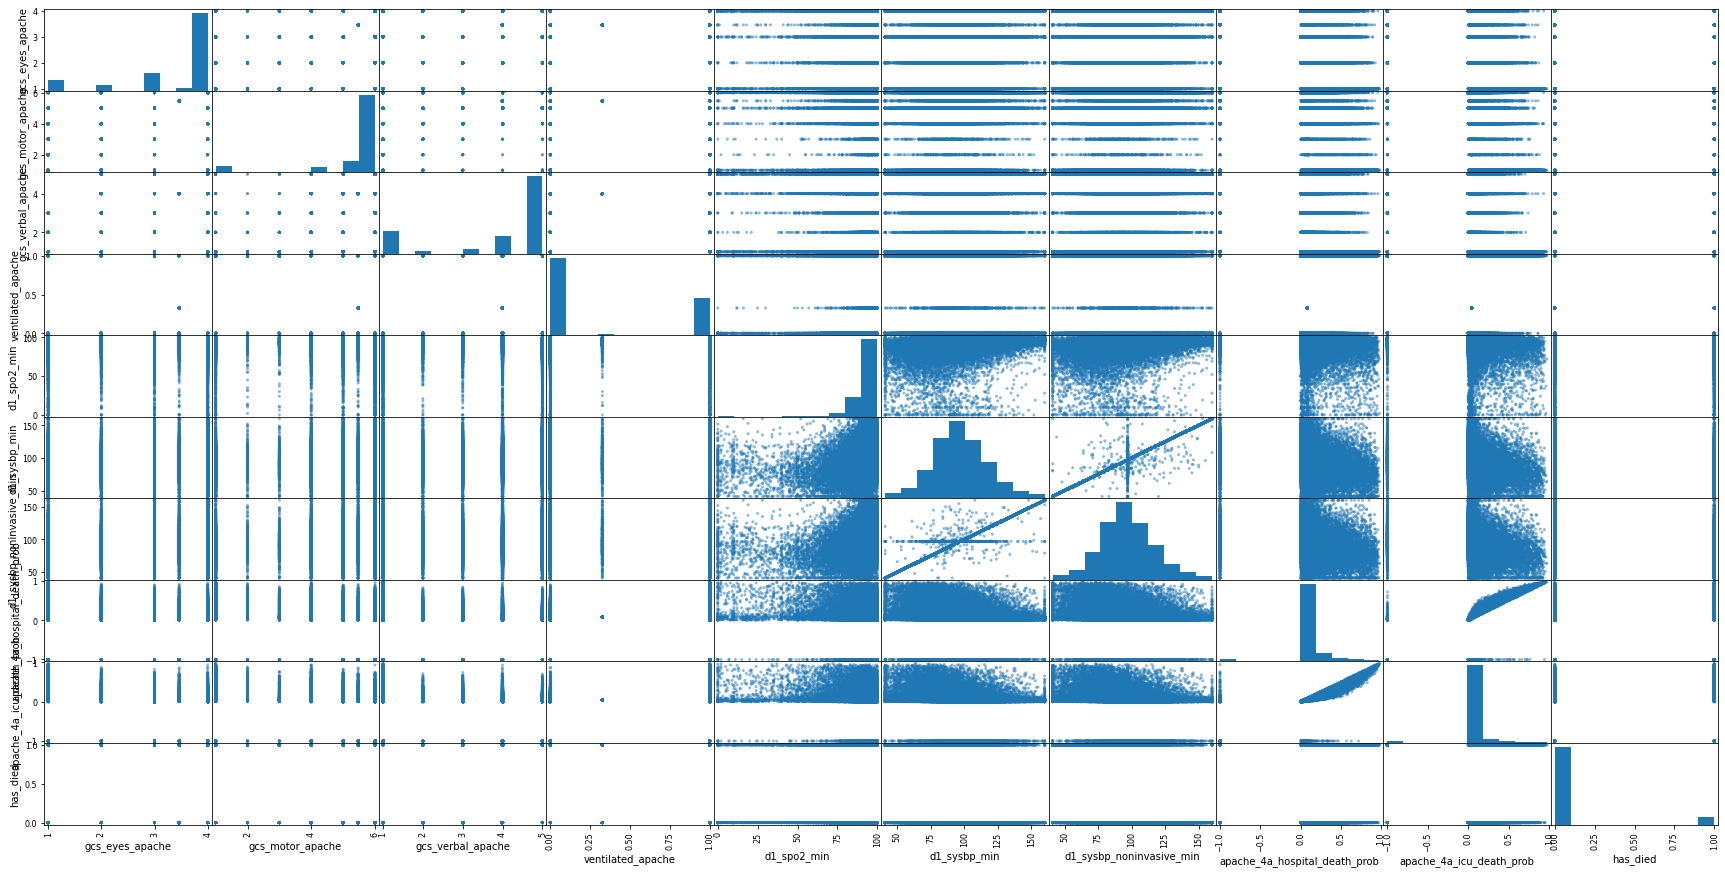

In [24]:
scatter_matrix(df[sc],figsize=(30,15))

In [25]:
plt.show()

## Dropping columns based on correlation


In [26]:
#Saving the patient_id column for further analysis
ids = pd.DataFrame(data={"patient_id":test["patient_id"]})

In [27]:
df.drop(columns = ['encounter_id', 'patient_id', 'hospital_id', 'icu_id', 'd1_diasbp_max', 'aids'], inplace=True)

In [28]:
test.drop(columns = ['encounter_id', 'patient_id', 'hospital_id', 'icu_id', 'd1_diasbp_max', 'aids'], inplace=True)

In [29]:
df

age        bmi  elective_surgery  ethnicity  gender  height  \
0      66.0  35.693127                 0        2.0       0  152.40   
1      48.0  18.966902                 0        0.0       0  165.10   
2      76.0  19.278960                 0        2.0       1  173.00   
3      43.0  45.617284                 0        2.0       1  180.00   
4      86.0  26.756678                 0        2.0       0  154.90   
...     ...        ...               ...        ...     ...     ...   
64194  56.0  35.693127                 0        2.0       1  172.70   
64195  72.0  30.458746                 0        2.0       1  175.30   
64196  27.0  27.476316                 0        5.0       1  170.10   
64197  52.0  18.818924                 0        2.0       0  163.00   
64198  77.0  14.844926                 0        2.0       0  195.59   

       icu_admit_source  icu_stay_type  icu_type  pre_icu_los_days  ...  \
0                   0.0            2.0       5.0             435.0  ...   
1                   0.0            0.0       2.0            2066.0  ...   
2                   0.0            1.0       5.0             683.0  ...   
3                   1.0            0.0       5.0            1960.0  ...   
4                   0.0            0.0       5.0            1594.0  ...   
...                 ...            ...       ...               ...  ...   
64194               0.0            0.0       5.0             418.0  ...   
64195               0.0            0.0       7.0             419.0  ...   
64196               0.0            0.0       5.0             416.0  ...   
64197               3.0            0.0       0.0             461.0  ...   
64198               0.0            0.0       3.0             755.0  ...   

       cirrhosis  diabetes_mellitus  hepatic_failure  immunosuppression  \
0            0.0                0.0              0.0                0.0   
1            0.0                0.0              0.0                0.0   
2            0.0                0.0              0.0                0.0   
3            0.0                0.0              0.0                0.0   
4            0.0                0.0              0.0                0.0   
...          ...                ...              ...                ...   
64194        0.0                0.0              0.0                0.0   
64195        0.0                1.0              0.0                0.0   
64196        0.0                1.0              0.0                0.0   
64197        0.0                1.0              0.0                0.0   
64198        0.0                0.0              0.0                0.0   

       leukemia  lymphoma  solid_tumor_with_metastasis  apache_3j_bodysystem  \
0           0.0       0.0                          0.0                   8.0   
1           0.0       0.0                          0.0                   9.0   
2           0.0       0.0                          1.0                   9.0   
3           0.0       0.0                          0.0                   2.0   
4           0.0       0.0                          0.0                   0.0   
...         ...       ...                          ...                   ...   
64194       0.0       0.0                          0.0                   8.0   
64195       0.0       0.0                          0.0                   0.0   
64196       0.0       0.0                          0.0                   5.0   
64197       0.0       0.0                          0.0                   0.0   
64198       0.0       0.0                          0.0                   8.0   

       apache_2_bodysystem  has_died  
0                      6.0         0  
1                      0.0         1  
2                      0.0         0  
3                      5.0         0  
4                      0.0         1  
...                    ...       ...  
64194                  6.0         0  
64195                  0.0         0  
64196                  3.0         0  
64

In [30]:
# Trying without droping any field

## Preparing the training data

In [31]:
X = df.drop(['has_died'], axis = 1)
y = df['has_died']

### Feature Scaling

In [32]:
for column in X.columns:
    X[column] = X[column]  / X[column].abs().max()


In [33]:
for column in test.columns:
    test[column] = test[column]  / test[column].abs().max()


## Using CatBoostClassidier

In [34]:
import catboost
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


def objective(trial):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        'learning_rate' : trial.suggest_loguniform('learning_rate', 0.001, 0.3),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "max_depth": trial.suggest_int("max_depth", 1, 15),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
    }
    

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_uniform("subsample", 0.1, 1)

    gbm = catboost.CatBoostClassifier(**param, iterations = 10000)

    gbm.fit(X_train, y_train, eval_set = [(X_val, y_val)], verbose = 0, early_stopping_rounds = 100)

    preds = gbm.predict(X_val)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(y_val, pred_labels)
    
    return accuracy

#study = optuna.create_study(direction = "maximize")
#study.optimize(objective, n_trials = 200, show_progress_bar = True)

In [35]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier()
cb.fit(X, y)


Learning rate set to 0.060918
0:	learn: 0.6192489	total: 96.2ms	remaining: 1m 36s
1:	learn: 0.5587753	total: 135ms	remaining: 1m 7s
2:	learn: 0.5029464	total: 172ms	remaining: 57.1s
3:	learn: 0.4601593	total: 213ms	remaining: 53s
4:	learn: 0.4259215	total: 244ms	remaining: 48.5s
5:	learn: 0.3968469	total: 278ms	remaining: 46s
6:	learn: 0.3726994	total: 311ms	remaining: 44.1s
7:	learn: 0.3493617	total: 341ms	remaining: 42.3s
8:	learn: 0.3299629	total: 374ms	remaining: 41.1s
9:	learn: 0.3129836	total: 410ms	remaining: 40.5s
10:	learn: 0.2998237	total: 449ms	remaining: 40.4s
11:	learn: 0.2874842	total: 482ms	remaining: 39.7s
12:	learn: 0.2762748	total: 516ms	remaining: 39.2s
13:	learn: 0.2671219	total: 567ms	remaining: 39.9s
14:	learn: 0.2607668	total: 628ms	remaining: 41.3s
15:	learn: 0.2551378	total: 705ms	remaining: 43.3s
16:	learn: 0.2486987	total: 792ms	remaining: 45.8s
17:	learn: 0.2443509	total: 862ms	remaining: 47s
18:	learn: 0.2399057	total: 931ms	remaining: 48.1s
19:	learn: 0.23

In [36]:
output=pd.DataFrame(data={"patient_id":ids["patient_id"],"has_died":cb.predict(test)})
output.to_csv("ccb.csv",index=False)
output.head()

patient_id  has_died
0      112951         0
1       17307         0
2      123759         0
3       47970         0
4       24104         0

In [37]:
X

age       bmi  elective_surgery  ethnicity  gender    height  \
0      0.741573  0.526331               0.0        0.4     0.0  0.779181   
1      0.539326  0.279686               0.0        0.0     0.0  0.844113   
2      0.853933  0.284288               0.0        0.4     1.0  0.884503   
3      0.483146  0.672673               0.0        0.4     1.0  0.920292   
4      0.966292  0.394554               0.0        0.4     0.0  0.791963   
...         ...       ...               ...        ...     ...       ...   
64194  0.629213  0.526331               0.0        0.4     1.0  0.882969   
64195  0.808989  0.449145               0.0        0.4     1.0  0.896263   
64196  0.303371  0.405166               0.0        1.0     1.0  0.869676   
64197  0.584270  0.277504               0.0        0.4     0.0  0.833376   
64198  0.865169  0.218903               0.0        0.4     0.0  1.000000   

       icu_admit_source  icu_stay_type  icu_type  pre_icu_los_days  ...  \
0                  0.00            1.0  0.714286          0.053473  ...   
1                  0.00            0.0  0.285714          0.253964  ...   
2                  0.00            0.5  0.714286          0.083958  ...   
3                  0.25            0.0  0.714286          0.240934  ...   
4                  0.00            0.0  0.714286          0.195943  ...   
...                 ...            ...       ...               ...  ...   
64194              0.00            0.0  0.714286          0.051383  ...   
64195              0.00            0.0  1.000000          0.051506  ...   
64196              0.00            0.0  0.714286          0.051137  ...   
64197              0.75            0.0  0.000000          0.056669  ...   
64198              0.00            0.0  0.428571          0.092809  ...   

       apache_4a_icu_death_prob  cirrhosis  diabetes_mellitus  \
0                          0.02        0.0                0.0   
1                          0.07        0.0                0.0   
2                          0.16        0.0                0.0   
3                          0.05        0.0                0.0   
4                          0.04        0.0                0.0   
...                         ...        ...                ...   
64194                      0.01        0.0                0.0   
64195                      0.01        0.0                1.0   
64196                      0.03        0.0                1.0   
64197                      0.04        0.0                1.0   
64198                      0.17        0.0                0.0   

       hepatic_failure  immunosuppression  leukemia  lymphoma  \
0                  0.0                0.0       0.0       0.0   
1                  0.0                0.0       0.0       0.0   
2                  0.0                0.0       0.0       0.0   
3                  0.0                0.0       0.0       0.0   
4                  0.0                0.0       0.0       0.0   
...                ...                ...       ...       ...   
64194              0.0                0.0       0.0       0.0   
64195              0.0                0.0       0.0       0.0   
64196              0.0                0.0       0.0       0.0   
64197              0.0                0.0       0.0       0.0   
64198              0.0                0.0       0.0       0.0   

       solid_tumor_with_metastasis  apache_3j_bodysystem  apache_2_bodysystem  
0                              0.0                   0.8             0.666667  
1                              0.0                   0.9             0.000000  
2                              1.0                   0.9             0.000000  
3                              0.0                   0.2             0.555556  
4                              0.0                   0.0             0.000000  
...                            ...                   ...                  ...  
64194                          0.0                   0.8             0.66666

## Trying Neural Network

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [39]:
model = Sequential()
model.add(Dense(77, input_shape=(77,), activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

2022-11-11 13:09:56.829103: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-11 13:09:56.936710: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-11 13:09:56.937921: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-11 13:09:56.941884: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [40]:
result=model.fit(X,y,batch_size=32,epochs=50)

2022-11-11 13:10:00.315279: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
2007/2007 [==============================] - 6s 2ms/step - loss: 0.2254 - accuracy: 0.9202
Epoch 2/50
2007/2007 [==============================] - 5s 3ms/step - loss: 0.2119 - accuracy: 0.9233
Epoch 3/50
2007/2007 [==============================] - 5s 3ms/step - loss: 0.2087 - accuracy: 0.9241
Epoch 4/50
2007/2007 [==============================] - 5s 3ms/step - loss: 0.2076 - accuracy: 0.9247
Epoch 5/50
2007/2007 [==============================] - 5s 2ms/step - loss: 0.2058 - accuracy: 0.9251
Epoch 6/50
2007/2007 [==============================] - 5s 3ms/step - loss: 0.2043 - accuracy: 0.9252
Epoch 7/50
2007/2007 [==============================] - 5s 2ms/step - loss: 0.2045 - accuracy: 0.9259
Epoch 8/50
2007/2007 [==============================] - 5s 2ms/step - loss: 0.2035 - accuracy: 0.9259
Epoch 9/50
2007/2007 [==============================] - 5s 3ms/step - loss: 0.2030 - accuracy: 0.9261
Epoch 10/50
2007/2007 [==============================] - 5s 3ms/step - loss: 0.201

In [41]:
test

age       bmi  elective_surgery  ethnicity  gender    height  \
0      0.640449  0.356289               1.0        0.4     1.0  0.986758   
1      0.752809  0.321919               0.0        0.4     1.0  0.870188   
2      0.808989  0.358804               0.0        0.4     1.0  0.961194   
3      0.584270  0.407364               0.0        0.4     0.0  0.828263   
4      0.348315  0.587916               1.0        0.4     0.0  0.779181   
...         ...       ...               ...        ...     ...       ...   
27509  0.842697  0.466331               0.0        0.4     0.0  0.787361   
27510  0.752809  0.560995               0.0        0.4     1.0  0.844113   
27511  0.786517  0.324385               0.0        0.4     0.0  0.804745   
27512  0.786517  0.663502               0.0        0.4     0.0  0.843601   
27513  0.606742  0.356289               1.0        0.4     1.0  0.909044   

       icu_admit_source  icu_stay_type  icu_type  pre_icu_los_days  ...  \
0                  0.50            0.0  1.000000          0.114805  ...   
1                  0.00            0.0  0.857143          0.102851  ...   
2                  0.00            0.0  0.428571          0.076827  ...   
3                  0.00            0.0  0.714286          0.078695  ...   
4                  0.50            0.0  0.714286          0.111568  ...   
...                 ...            ...       ...               ...  ...   
27509              0.25            0.0  0.714286          0.149047  ...   
27510              0.00            0.0  0.571429          0.054290  ...   
27511              0.00            0.0  0.714286          0.073341  ...   
27512              0.00            0.0  0.714286          0.047815  ...   
27513              0.50            0.0  0.571429          0.496576  ...   

       apache_4a_icu_death_prob  cirrhosis  diabetes_mellitus  \
0                      0.010000        0.0                0.0   
1                      0.090000        0.0                0.0   
2                      0.050000        0.0                0.0   
3                      0.010000        0.0                0.0   
4                      0.045598        0.0                0.0   
...                         ...        ...                ...   
27509                  0.045598        0.0                0.0   
27510                  0.040000        0.0                0.0   
27511                  0.090000        0.0                1.0   
27512                 -1.000000        0.0                1.0   
27513                  0.000000        0.0                0.0   

       hepatic_failure  immunosuppression  leukemia  lymphoma  \
0                  0.0                0.0       0.0       0.0   
1                  0.0                0.0       0.0       0.0   
2                  0.0                0.0       0.0       0.0   
3                  0.0                0.0       0.0       0.0   
4                  0.0                0.0       0.0       0.0   
...                ...                ...       ...       ...   
27509              0.0                0.0       0.0       0.0   
27510              0.0                0.0       0.0       0.0   
27511              0.0                0.0       0.0       0.0   
27512              0.0                0.0       0.0       0.0   
27513              0.0                0.0       0.0       0.0   

       solid_tumor_with_metastasis  apache_3j_bodysystem  apache_2_bodysystem  
0                              0.0                   1.0             0.777778  
1                              0.0                   1.0             0.777778  
2                              0.0                   0.6             0.888889  
3                              0.0                   0.5             0.333333  
4                              0.0                   0.0             1.000000  
...                            ...                   ...                  ...  
27509                          0.0                   0.8             0.66666

In [42]:
ids.loc[0]['patient_id']

112951

In [43]:
pred= model.predict(test)

In [44]:
ans={}
for j in range(27514):
    arr=np.array(test.loc[50])
    val=pred[j][0]
    # print(ans)
    if(val>=0.5):
        ans[ids.loc[j]['patient_id']]=1
    else:
        ans[ids.loc[j]['patient_id']]=0

In [45]:
ans

{112951: 0,
 17307: 0,
 123759: 0,
 47970: 0,
 24104: 0,
 83696: 0,
 73287: 0,
 101649: 0,
 113052: 0,
 122641: 0,
 112560: 0,
 101675: 0,
 23808: 1,
 74439: 0,
 125956: 0,
 102579: 0,
 60896: 0,
 113381: 0,
 59920: 0,
 35243: 0,
 60604: 0,
 97077: 0,
 4486: 0,
 80221: 0,
 11770: 0,
 47100: 0,
 62758: 0,
 104180: 0,
 120667: 0,
 76826: 0,
 29233: 0,
 4440: 0,
 38778: 0,
 41002: 1,
 81157: 0,
 117275: 0,
 89964: 0,
 53539: 0,
 119136: 0,
 64829: 0,
 85257: 0,
 35128: 0,
 1758: 0,
 104261: 0,
 117181: 0,
 3753: 1,
 16742: 0,
 91417: 0,
 8264: 0,
 25747: 0,
 35002: 0,
 114194: 0,
 66958: 0,
 62263: 0,
 40274: 0,
 38975: 0,
 24168: 0,
 71416: 0,
 48324: 0,
 5845: 0,
 55260: 0,
 93525: 0,
 85294: 0,
 39310: 1,
 30943: 0,
 43765: 0,
 743: 0,
 106983: 0,
 127709: 0,
 25842: 0,
 103355: 0,
 2571: 0,
 87589: 0,
 56468: 0,
 16980: 0,
 111253: 0,
 113495: 0,
 114024: 0,
 96459: 0,
 77909: 0,
 115406: 0,
 37883: 0,
 93720: 0,
 89187: 0,
 48727: 0,
 107089: 0,
 88168: 0,
 117883: 0,
 107218: 0,
 37

In [46]:
ans1 = pd.DataFrame([ans.keys(), ans.values()]).T
ans1.columns = ['patient_id', 'has_died']

In [47]:
ans1.set_index('patient_id', inplace=True)

In [48]:
ans1.to_csv('nn32.csv')